# Supplementary Materials - Code
## Math 168 Final Project
### Aditya Pimplaskar, Daniel Koo, Aleksandre Ninua

In [4]:
# Packages

import networkx as nx
import numpy as np
import numpy.random as rand
import random
from collections import deque
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
import operator
import collections

Pagerank max: 23 | Pagerank min: 136 | Pagerank mid: 223
Betweenness max: 23 | Betweenness min: 7 | Betweenness mid: 183
Closeness max: 23 | Closeness min: 179 | Closeness mid: 186
radius: 2.000000
diameter: 3.000000
average shortest path: 1.860440
average degree: 49.991525
average neighbor's degree: 55.693933


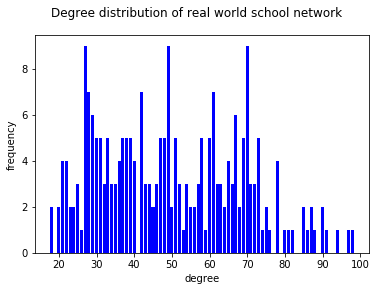

In [5]:
# Data cleaning and retrieving network features

def cleanGraph(Gr):
    # takes gexf file
    # output: better indexed network, dict of node labels to easier indices
    inds = {}
    for i in list(Gr.nodes):
        inds[i] = Gr.nodes[i]
    Gr = nx.convert_node_labels_to_integers(Gr)
    return Gr, inds

day1 = nx.read_gexf("data/sp_data_school_day_1_g.gexf_")
G, inds = cleanGraph(day1)
#G = nx.gnp_random_graph(600,0.1)
pagerank = nx.pagerank(G)
bet = nx.betweenness_centrality(G)
close = nx.closeness_centrality(G)

def getMaxMinMid(centralities):
    # returns node label for max, min, mid
    import operator
    length = len(centralities)
    nodelist = list(sorted(centralities.items(), key = operator.itemgetter(1)))

    mmax = nodelist[length-1][0]
    mmin = nodelist[0][0]
    mmid = nodelist[int(length/2)][0]

    return mmax, mmin, mmid

maxpr, minpr, midpr = getMaxMinMid(pagerank)
maxbet, minbet, midbet = getMaxMinMid(bet)
maxclose, minclose, midclose = getMaxMinMid(close)

print("Pagerank max:", maxpr, "| Pagerank min:", minpr, "| Pagerank mid:", midpr)
print("Betweenness max:", maxbet, "| Betweenness min:", minbet, "| Betweenness mid:", midbet)
print("Closeness max:", maxclose, "| Closeness min:", minclose, "| Closeness mid:", midclose)

degrees = sorted([x for n, x in G.degree()], reverse = True)
degreeCount = collections.Counter(degrees)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')
fig.suptitle("Degree distribution of real world school network")
plt.xlabel("degree")
plt.ylabel("frequency")
plt.savefig("DegreeDist.png", dpi = 500)

neighbor_degs = nx.average_neighbor_degree(G).values()

print("radius: %f" % nx.radius(G))
print("diameter: %f" % nx.diameter(G))
print("average shortest path: %f" % nx.average_shortest_path_length(G))
print("average degree: %f" % np.mean(degrees))
print("average neighbor's degree: %f" % np.mean(list(neighbor_degs)))

In [7]:
# Simulations

def BFS_t(Gr,zero,p,h,d,s,x,r):

        #Prameters:
        #Gr - Graph
        #zero - patient zero
        #p - probability of transmitting infection
            #by a symptomatic host at every itneraction
        #s - probability of developing symptoms once infected
        #h - probability of quarantining once symptomatic
        #r - probability of recovering
        #x - probability of death
        #d - number of days simulation is run
        if d%2 == 0:
           nrows = int(d/2)
        else:
           nrows = int(d/2)+1
        ncols = 2
        #f, axes = plt.subplots(nrows, ncols, figsize = (40,40))

        #Status arrays
        infected = [False] * Gr.number_of_nodes()
        symptomatic = [False] * Gr.number_of_nodes()
        quarantined = [False] * Gr.number_of_nodes()
        recovered = [False] * Gr.number_of_nodes()
        deceased = [False] * Gr.number_of_nodes()
        infected_days = [0] * Gr.number_of_nodes()

        #Metrics
        inf = 1
        rec = 0
        dead = 0
        days_rem = d

        #Probability arrays
        death_rate = [x] * Gr.number_of_nodes()
        recovery_rate = [r] * Gr.number_of_nodes()
        symptom_rate = [s] * Gr.number_of_nodes()

        if x < 0:
            for i in range(0,Gr.number_of_nodes()):
                death_rate[i] = 1/np.random.gamma(4.94, 1/.26)
        if r < 0:
            for i in range(0,Gr.number_of_nodes()):
                recovery_rate[i] = 1/np.random.gamma(8.16, 1/.33)
        if s < 0:
            for i in range(0,Gr.number_of_nodes()):
                symptom_rate[i] = 1/np.random.gamma(5.81, 1/0.95)

        #Output array
        GDP_per_capita = 62886.8
        GDP_daily_per_capita = GDP_per_capita / 365
        life_expectancy = 78.6
        hospital_rate = 0.13
        hospital_cost = 14366
        symptom_cost = 3045
        infected_cost = hospital_cost*hospital_rate + symptom_cost*(1-hospital_rate)
        death_cost = 10000000 / (life_expectancy * 365)
        
        
        total_output = 0

        #Result arrays
        queue = []
        infected_nodes = []
        symptomatic_nodes = []
        quarantined_nodes = []
        recovered_nodes = []
        deceased_nodes = []

        # element at position i is the number of infected people on day i
        num_infected_per_day    = []
        num_symptomatic_per_day = []
        num_quarantined_per_day = []
        num_recovered_per_day   = []
        num_deceased_per_day    = []
        num_total_infected    = []
        num_sus = []

        queue.append(zero)
        infected[zero] = True
        infected_nodes.append(zero)
        while days_rem > 0:
            days_rem-=1

            while queue:
                s = queue.pop(0)
                for i in Gr.neighbors(s):
                    if infected[i] == False and recovered[i] == False and deceased[i] == False and quarantined[i] == False:
                        if rand.uniform(0,10) < p*10:
                            infected[i] = True
                            infected_nodes.append(i)
                            inf+=1

            for i in range(0,len(infected)):
                if quarantined[i] == False:
                    rand_num = rand.uniform(0,10)
                    if symptomatic[i] == False:
                        if rand_num < h*10:
                            quarantined[i] = True
                            quarantined_nodes.append(i)
                    else:
                        if rand_num/2 < h*10:
                            quarantined[i] = True
                            quarantined_nodes.append(i)
                if infected[i] == True:
                    infected_days[i]+=1
                    if symptomatic[i] == False:
                            if rand.uniform(0,10) < symptom_rate[i]*10:
                                    symptomatic[i] = True
                                    symptomatic_nodes.append(i)
                            elif rand.uniform(0,10) < recovery_rate[i]*10:
                                        recovered[i] = True
                                        rec+=1
                                        inf-=1
                                        recovered_nodes.append(i)
                                        infected[i] = False
                                        symptomatic[i] = False
                                        infected_nodes.remove(i)
                    else:
                            if rand.uniform(0,10) < death_rate[i]*10:
                                        deceased[i] = True
                                        dead+=1
                                        inf-=1
                                        deceased_nodes.append(i)
                                        infected[i] = False
                                        symptomatic[i] = False
                                        symptomatic_nodes.remove(i)
                                        infected_nodes.remove(i)
                            elif rand.uniform(0,10) < recovery_rate[i]*10:
                                        recovered[i] = True
                                        rec+=1
                                        inf-=1
                                        recovered_nodes.append(i)
                                        infected[i] = False
                                        symptomatic[i] = False
                                        symptomatic_nodes.remove(i)
                                        infected_nodes.remove(i)

     
                    if quarantined[i] == False and recovered[i] == False and deceased[i] == False:
                        queue.append(i)
            for i in range(0,Gr.number_of_nodes()):
                if quarantined[i] == False and deceased[i] == False and symptomatic[i] == False:
                    total_output+=GDP_daily_per_capita
                elif quarantined[i] == True and deceased[i] == False and symptomatic[i] == False:
                    total_output+=0.5*GDP_daily_per_capita
                elif symptomatic[i] == True and deceased[i] == False:
                    total_output-= infected_cost
                elif deceased[i] == True:
                    total_output-= death_cost
            # Update per-day numbers
            num_infected_per_day.append(inf)
            num_symptomatic_per_day.append(len(symptomatic_nodes))
            num_quarantined_per_day.append(len(quarantined_nodes))
            num_recovered_per_day.append(rec)
            num_deceased_per_day.append(dead)
            num_total_infected.append(inf+rec+dead)
            num_sus.append(Gr.number_of_nodes()-inf-rec-dead)
            
            
            colvec = [0]* Gr.number_of_nodes()
            for i in range(Gr.number_of_nodes()):
                if quarantined[i] == False and infected[i] == False and deceased[i] == False:
                    colvec[i] = "g"
                if quarantined[i]:
                    colvec[i] = 'b'
                if deceased[i]:
                    colvec[i] = 'r'
                if infected[i]:
                    colvec[i] = 'y'
                if symptomatic[i]:
                    colvec[i] = 'm'
                if recovered[i]:
                    colvec[i] = 'c'
                ColorLegend = {"Recovered": "c", "Asymptomatic":"y", "Symptomatic":"m", "Deceased":"r", "Quarantined and Healthy":"b", "Healthy": "g"}

            if days_rem == 0 or days_rem == 14 or days_rem == 27:
                fig = plt.figure(figsize = (10,10))
                fig.suptitle("Network-wide infection spread at the end of day " + str(d - days_rem))
                #n = nx.draw_networkx(Gr, pos=nx.kamada_kawai_layout(Gr), node_color=colvec, cmap=plt.cm.rainbow) #visualizes
                layout = nx.kamada_kawai_layout(Gr)
                ax = fig.add_subplot(1,1,1)
                for label in ColorLegend:
                    ax.plot([0],[0],color=ColorLegend[label],label=label)
                nx.draw_networkx_nodes(Gr, pos = layout, node_color = colvec)
                nx.draw_networkx_edges(Gr, pos = layout, alpha = 0.6)
                plt.axis('off')
                sm = plt.cm.ScalarMappable(cmap=plt.cm.rainbow, norm = None)
                sm.set_array([])
                plt.legend()
                #cbar = plt.colorbar(sm)
                plt.savefig("Network-wide infection spread at the end of day " + str(d - days_rem), dpi = 500)
                
        return [infected_nodes,quarantined_nodes,symptomatic_nodes,recovered_nodes,deceased_nodes, num_infected_per_day, num_quarantined_per_day, num_symptomatic_per_day, num_recovered_per_day, num_deceased_per_day,num_total_infected,num_sus,total_output]
    
def multi_BFS_t(Gr, zero, beta, qrnt, days, s_rate, x_rate, r_rate, n, prefix):
    avg_res_per_day = [[0] * days] * 7

    for i in range(n):
        res = BFS_t(Gr, zero, beta, qrnt, days, s_rate, x_rate, r_rate)[5:12]
        for j in range(len(res)):
            avg_res_per_day[j] = [x + y for x, y in zip(avg_res_per_day[j], res[j])]
            # print(res[j])
            # for k in range(days):
            #     avg_res_per_day[j][k] += res[j][k]

    for l in range(7):
        for m in range(days):
            if avg_res_per_day[l][m] != 0:
                avg_res_per_day[l][m] /= n
    plot_numbers_per_day(avg_res_per_day, beta, qrnt, days, prefix)
    return avg_res_per_day


In [8]:
# Visualizations 

def plot_numbers_per_day(res, beta, qrnt, days, prefix):
    days_axis = [i for i in range(1, days+1)]
    labels = ["Infected Per Day", "Cumulative Quarantined", "Symptomatic Per Day", "Recovered Per Day", "Deceased Per Day","Total infections","Susceptible"]
    fig = plt.figure()

    fig.suptitle("Beta = " + str(beta) + ", Quarantine Rate = " + str(qrnt), fontsize=12)
    for p in range(len(res)-1):
        ax = fig.add_subplot(111)
        ax.plot(days_axis, res[p], label=labels[p])
        ax.legend(loc="upper right")
        filename = "figure "+ prefix+" " + str(beta) + " " + str(qrnt) +".png"
        plt.savefig(filename, dpi = 500)   